### Open Source And General Resource Software

This dataset lists out all software in use by NASA

In [1]:
from platform import python_version
print(python_version())

3.6.8


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from numpy import log as ln
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from pylab import * 
from scipy import *
import seaborn as sns
import json, requests

### Importing and reading data from Nasa api

In [8]:
data = pd.read_json ("https://data.nasa.gov/resource/osr.json")
data

,case_number,nasa_center,ntr_title,sra_date,sra_final
0,ARC-14136-1,ARC,Adaptive Relevance-Learning Software Component...,2001-10-19T00:00:00.000,Academic Worldwide
1,ARC-14293-1,ARC,Genetic Graphs (JavaGenes),2005-09-19T00:00:00.000,Open Source
2,ARC-14297-1,ARC,"Automated Domain Decomposition Software, PEGAS...",2003-11-06T00:00:00.000,General US
3,ARC-14379-1,ARC,Man-machine Integration Design And Analysis Sy...,2002-03-27T00:00:00.000,General US
4,ARC-14400-1,ARC,PLOT3D Version 4.0,2001-01-29T00:00:00.000,General US
5,ARC-14467-1A,ARC,CFD Utility Software Library (previously Calle...,2014-01-24T00:00:00.000,Open Source
6,ARC-14487-1,ARC,CAPTools-based Automatic Parallelizer Using Op...,2005-02-14T00:00:00.000,Open Source
7,ARC-14490-1,ARC,Livingstone: A System For Automated Diagnosis ...,2001-11-13T00:00:00.000,Academic Worldwide
8,ARC-14529-1,ARC,IND 2.1 - Creation And Manipulation Of Decisio...,2004-01-21T00:00:00.000,Open Source
9,ARC-14583-1,ARC,"SLAB (Sound LAB) A Software-based, Real-time V...",2002-06-17T00:00:00.000,General Worldwide


### Getting some dataset information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 5 columns):
case_number    687 non-null object
nasa_center    687 non-null object
ntr_title      687 non-null object
sra_date       687 non-null object
sra_final      687 non-null object
dtypes: object(5)
memory usage: 26.9+ KB


In [10]:
data.describe()

,case_number,nasa_center,ntr_title,sra_date,sra_final
count,687,687,687,687,687
unique,687,10,687,502,10
top,GSC-14554-2,GRC,Airship Design and Analysis Code (ADAC),2002-03-06T00:00:00.000,General US
freq,1,165,1,23,318


### Checking if there is NaN values in the dataset

In [13]:
data.isnull().values.any()

False

### Which are the Nasa Centers that most reistered new softwares?

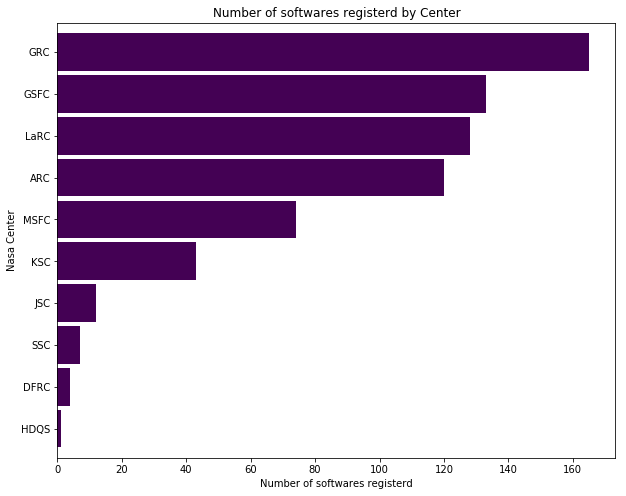

In [24]:
data['nasa_center'].value_counts().plot('barh', colormap='viridis', width=0.9, figsize=(10,8)).invert_yaxis()
plt.xlabel('Number of softwares registerd')
plt.ylabel('Nasa Center')
plt.title('Number of softwares registerd by Center')
plt.show()

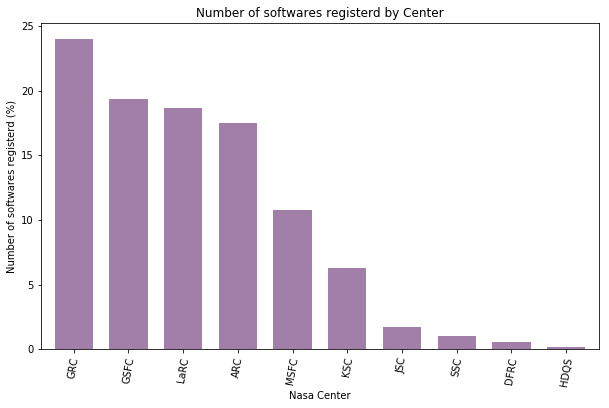

In [87]:
(data['nasa_center'].value_counts(normalize=True)*100).plot('bar', colormap='viridis', width=0.7, alpha=0.5, figsize=(10,6))
plt.ylabel('Number of softwares registerd (%)')
plt.xlabel('Nasa Center')
plt.xticks(rotation=80)
plt.title('Number of softwares registerd by Center')
plt.show()

In [27]:
data['nasa_center'].value_counts(normalize=True)*100

GRC     24.017467
GSFC    19.359534
LaRC    18.631732
ARC     17.467249
MSFC    10.771470
KSC      6.259098
JSC      1.746725
SSC      1.018923
DFRC     0.582242
HDQS     0.145560
Name: nasa_center, dtype: float64

In [30]:
data['nasa_center'].describe()

count     687
unique     10
top       GRC
freq      165
Name: nasa_center, dtype: object

In [35]:
print (data['nasa_center'].describe()['count'], 
       'softwares were registered by',
       data['nasa_center'].describe()['unique'], 'centers.',
      'Of those,',data['nasa_center'].describe()['top'],
       'registered the higher number, counting',
       data['nasa_center'].describe()['freq'], 'softwares.' )

687 softwares were registered by 10 centers. Of those, GRC registered the higher number, counting 165 softwares.


### Under what kind of Licence software were released?   
*SRA = Software Release Authority 

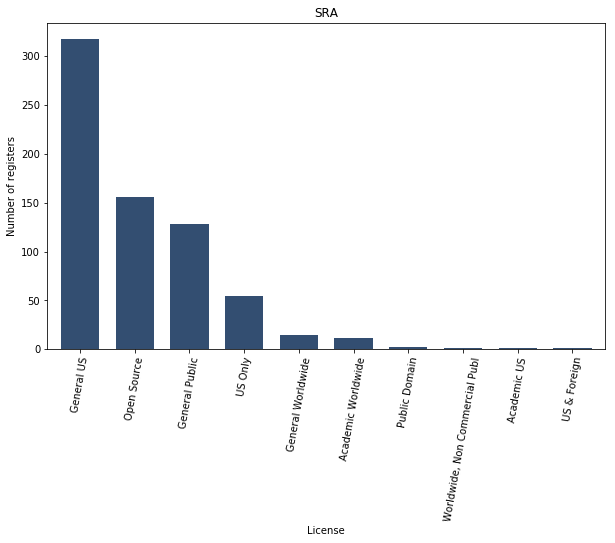

In [41]:
data['sra_final'].value_counts().plot('bar', colormap='cividis', width=0.7, alpha=0.8, figsize=(10,6))
plt.ylabel('Number of registers')
plt.xlabel('License')
plt.xticks(rotation=80)
plt.title('SRA')
plt.show()

In [45]:
data['sra_final'].value_counts(normalize=True)*100

General US                        46.288210
Open Source                       22.707424
General Public                    18.631732
US Only                            7.860262
General Worldwide                  2.183406
Academic Worldwide                 1.601164
Public Domain                      0.291121
Worldwide, Non Commercial Publ     0.145560
Academic US                        0.145560
US & Foreign                       0.145560
Name: sra_final, dtype: float64

In [43]:
data['sra_final'].describe()

count            687
unique            10
top       General US
freq             318
Name: sra_final, dtype: object

In [49]:
print('Between',data['sra_final'].describe()['unique'],
      'kinds of licenses, the majority of them, counting',
      data['sra_final'].value_counts(normalize=True).max()*100, 
      'were registered as',
      data['sra_final'].describe()['top'],'.' )

Between 10 kinds of licenses, the majority of them, counting 46.288209606986904 were registered as General US .


In [58]:
data.groupby('nasa_center')['sra_final'].describe()

,count,unique,top,freq
nasa_center,,,,
ARC,120,6,Open Source,70
DFRC,4,3,General Public,2
GRC,165,3,General US,161
GSFC,133,3,General Public,67
HDQS,1,1,General Worldwide,1
JSC,12,2,General US,6
KSC,43,3,General US,29
LaRC,128,4,General US,85
MSFC,74,7,US Only,54


Here, we have the top kind of licences for each center (top) and its frequence of register (freq), the total number of licences registered (count) and the kinds of licence (unique)

In [61]:
#total number of licences registered 
data.groupby('nasa_center')['sra_final'].count()

nasa_center
ARC     120
DFRC      4
GRC     165
GSFC    133
HDQS      1
JSC      12
KSC      43
LaRC    128
MSFC     74
SSC       7
Name: sra_final, dtype: int64

In [62]:
#kinds of licences registered 
data.groupby('nasa_center')['sra_final'].describe()['unique']

nasa_center
ARC     6
DFRC    3
GRC     3
GSFC    3
HDQS    1
JSC     2
KSC     3
LaRC    4
MSFC    7
SSC     1
Name: unique, dtype: object

In [63]:
#top kind of licences for each center 
data.groupby('nasa_center')['sra_final'].describe()['top']

nasa_center
ARC           Open Source
DFRC       General Public
GRC            General US
GSFC       General Public
HDQS    General Worldwide
JSC            General US
KSC            General US
LaRC           General US
MSFC              US Only
SSC        General Public
Name: top, dtype: object

In [64]:
#frequency of top kind of licences for each center 
data.groupby('nasa_center')['sra_final'].describe()['top']

nasa_center
ARC           Open Source
DFRC       General Public
GRC            General US
GSFC       General Public
HDQS    General Worldwide
JSC            General US
KSC            General US
LaRC           General US
MSFC              US Only
SSC        General Public
Name: top, dtype: object

### Registers by period (> 1 register)

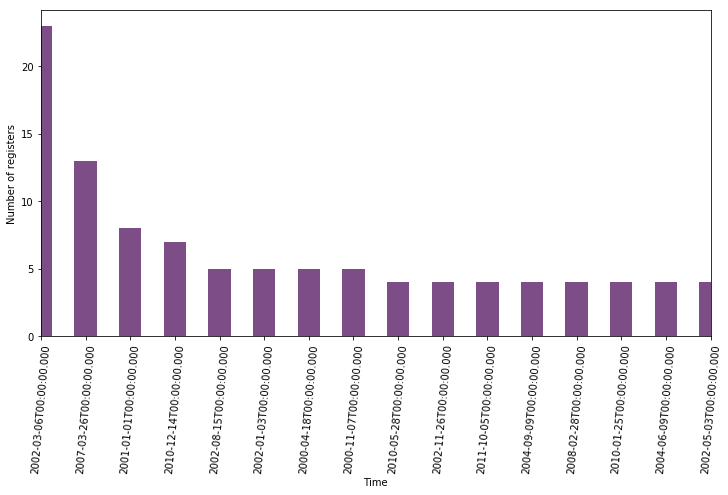

In [86]:
data['sra_date'].value_counts().plot('bar', colormap='viridis', width=0.5, alpha=0.7, figsize=(12,6))
plt.xticks(rotation=85)
plt.xlim(0, 15)
plt.xlabel('Time')
plt.ylabel('Number of registers')
plt.show()